There could be many things one can understand by analyzing this dataset.

What is the major reason people being kidnapped in each and every state?       
Offenders relation to the rape victim       
Juveniles family background, education and economic setup.           
Which state has more crime against children and women?         
Age group wise murder victim            
Crime by place of occurrence.            
Anti corruption cases vs arrests.               
Which state has more number of complaints against police?            
Which state is the safest for foreigners?              

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
#District wise Crimes until 2013
DWC_13 = pd.concat([pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/01_district_wise_crimes_committed_ipc_2001_2012.csv'),
                    pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/01_district_wise_crimes_committed_ipc_2013.csv')])

In [8]:
DWC_13.head()

,state_ut,district,year,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,kidnapping_abduction,...,arson,hurt_grevious_hurt,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls_from_foreign_countries,causing_death_by_negligence,other_ipc_crimes,total_ipc_crimes
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [9]:
DWC_13.tail()

,state_ut,district,year,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,kidnapping_abduction,...,arson,hurt_grevious_hurt,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls_from_foreign_countries,causing_death_by_negligence,other_ipc_crimes,total_ipc_crimes
818,Lakshadweep,LAKSHADWEEP,2013,0,0,0,2,0,2,0,...,1,5,0,1,0,0,0,0,18,40
819,Lakshadweep,ZZ TOTAL,2013,0,0,0,2,0,2,0,...,1,5,0,1,0,0,0,0,18,40
820,Puducherry,KARAIKAL,2013,6,3,0,6,0,6,3,...,3,160,1,1,1,1,0,32,329,643
821,Puducherry,PUDUCHERRY,2013,25,8,2,11,0,11,38,...,13,555,0,11,7,7,0,206,1464,3113
822,Puducherry,ZZ TOTAL,2013,31,11,2,17,0,17,41,...,16,715,1,12,8,8,0,238,1793,3756


In [10]:
DWC_13.columns

Index(['state_ut', 'district', 'year', 'murder', 'attempt_to_murder',
       'culpable_homicide_not_amounting_to_murder', 'rape', 'custodial_rape',
       'other_rape', 'kidnapping_abduction',
       'kidnapping_and_abduction_of_women_and_girls',
       'kidnapping_and_abduction_of_others', 'dacoity',
       'preparation_and_assembly_for_dacoity', 'robbery', 'burglary', 'theft',
       'auto_theft', 'other_theft', 'riots', 'criminal_breach_of_trust',
       'cheating', 'counterfieting', 'arson', 'hurt_grevious_hurt',
       'dowry_deaths', 'assault_on_women_with_intent_to_outrage_her_modesty',
       'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives',
       'importation_of_girls_from_foreign_countries',
       'causing_death_by_negligence', 'other_ipc_crimes', 'total_ipc_crimes'],
      dtype='object')

In [11]:
# State_ut values from 2001 - 2012 are capital converting them into titles
def f(r):
    return str.title(r)


DWC_13['state_ut'] = DWC_13['state_ut'].map(f)

In [12]:
# formattiing A&N Islands
def f(r):
    if r == 'A&N Islands':
        return 'A & N Islands'
    if r == 'D&N Haveli':
        return 'D & N Haveli'
    if r == 'Delhi Ut':
        return 'Delhi'
    else:
        return r


DWC_13['state_ut'] = DWC_13['state_ut'].map(f)

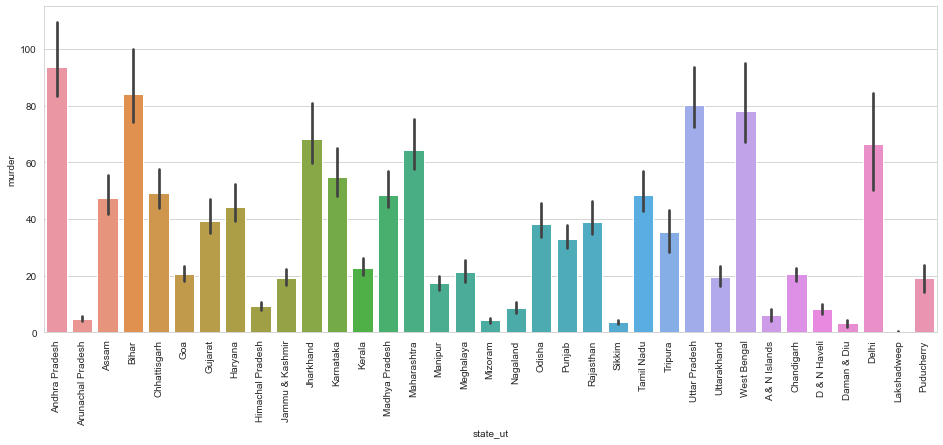

In [13]:
d = DWC_13[DWC_13['district'] != 'TOTAL']
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.barplot( x = 'state_ut',
             y = 'murder',
             data = d);
plt.xticks(rotation = 90);

* Now lets find what is the most crime in India

In [14]:
DWC_13[DWC_13['district'] != 'TOTAL'].drop(columns = ['state_ut','district','year']).sum().sort_values(ascending = False)[2:]


theft                                                  4477320
hurt_grevious_hurt                                     4063424
other_theft                                            2748553
auto_theft                                             1728767
burglary                                               1349696
causing_death_by_negligence                            1232401
cruelty_by_husband_or_his_relatives                    1128144
cheating                                               1008385
riots                                                   920175
assault_on_women_with_intent_to_outrage_her_modesty     602167
kidnapping_abduction                                    512862
murder                                                  475150
attempt_to_murder                                       428088
kidnapping_and_abduction_of_women_and_girls             383319
robbery                                                 318582
rape                                                   

In [15]:
# creating a new column total_theft to combine all the columns that are related to theft

def f(r):
    return r.preparation_and_assembly_for_dacoity + r.robbery + r.burglary + r.theft + r.auto_theft + r.other_theft + r.dacoity 



DWC_13['total_theft'] = DWC_13.apply(f, axis =1)

In [16]:
# creating a new column crimes_against_women to combine all the columns that are related to crimes against women

def f(r):
    return r.rape + r.custodial_rape + r.other_rape + r.dowry_deaths + r.assault_on_women_with_intent_to_outrage_her_modesty + r.importation_of_girls_from_foreign_countries + r.insult_to_modesty_of_women + r.cruelty_by_husband_or_his_relatives

 


DWC_13['crimes_against_women'] = DWC_13.apply(f, axis =1)

In [17]:
# creating a new column Total_murders to combine all the columns that are related to murders

def f(r):
    return r.murder + r.attempt_to_murder  + r.causing_death_by_negligence 


DWC_13['total_murders'] = DWC_13.apply(f, axis =1)

In [18]:
# creating a new column Total_kidnaps to combine all the columns that are related to kidnaps

def f(r):
    return r.kidnapping_and_abduction_of_women_and_girls + r.kidnapping_and_abduction_of_others + r.kidnapping_abduction

 
DWC_13['total_kidnaps'] = DWC_13.apply(f, axis =1)

In [19]:
# creating a new column Total_communal to combine all the columns that are related to communal crimes

def f(r):
    return r.riots +   r.arson  + r.culpable_homicide_not_amounting_to_murder + r.hurt_grevious_hurt

 
DWC_13['total_communal'] = DWC_13.apply(f, axis =1)

In [20]:
# creating a new column Total_cheatings to combine all the columns that are related to fraud

def f(r):
    return  r.criminal_breach_of_trust + r.cheating  + r.counterfieting 

 
DWC_13['total_cheatings'] = DWC_13.apply(f, axis =1)

In [21]:
DWC_13_summarized = DWC_13[['state_ut', 'district', 'year','total_theft','crimes_against_women','total_murders','total_kidnaps','total_communal','total_cheatings']]

In [22]:
DWC_13_summarized.head()

,state_ut,district,year,total_theft,crimes_against_women,total_murders,total_kidnaps,total_communal,total_cheatings
0,Andhra Pradesh,ADILABAD,2001,646,474,342,92,1256,121
1,Andhra Pradesh,ANANTAPUR,2001,947,349,546,106,1781,84
2,Andhra Pradesh,CHITTOOR,2001,1701,449,562,118,2284,251
3,Andhra Pradesh,CUDDAPAH,2001,449,278,366,50,983,51
4,Andhra Pradesh,EAST GODAVARI,2001,2508,472,580,98,1356,273


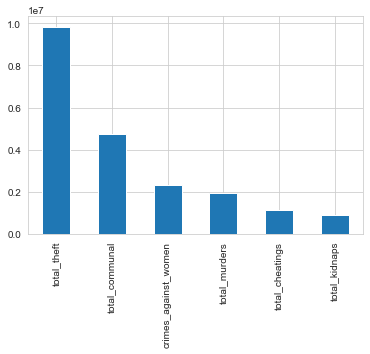

In [23]:
DWC_13_summarized[(DWC_13_summarized['district'] != 'ZZ TOTAL') & (DWC_13_summarized['district'] != 'TOTAL')].sum()[3:].sort_values(ascending = False).plot.bar();

* **The most common kind of crime in India is Theft**

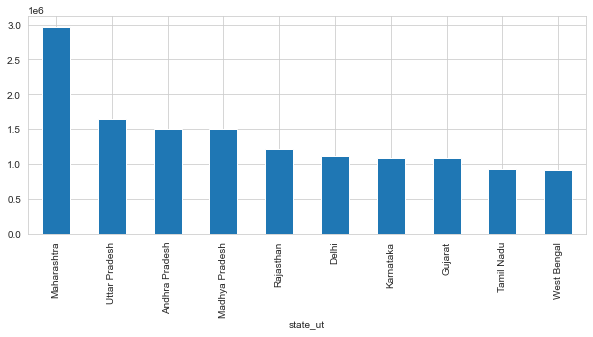

In [24]:
# plotting the distribution of thefts across different states
plt.figure(figsize = (10,4))
DWC_13_summarized.groupby('state_ut')['total_theft'].sum().sort_values(ascending = False)[:10].plot.bar();

* **Maharashtra has reported maximum theft cases in India**

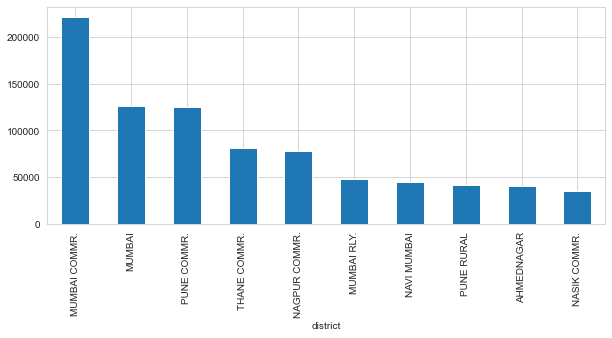

In [25]:
# plotting the distribution of thefts across different districts of Maharastra

plt.figure(figsize = (10,4))
DWC_13_summarized[(DWC_13_summarized['state_ut'] == 'Maharashtra') & 
                 (DWC_13_summarized['district'] != 'ZZ TOTAL') & 
                 (DWC_13_summarized['district'] != 'TOTAL')].groupby('district')['total_theft'].sum().sort_values(ascending = False)[:10].plot.bar();

* **Mumbai Commr has reported majority thefts in Mahatastra**

### Crime by place of occurrence

In [26]:
Crime_by_place = pd.concat([pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/17_crime_by_place_of_occurrence_2001_2012.csv'),
                            pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/17_crime_by_place_of_occurrence_2013.csv')])

In [27]:
Crime_by_place.isna().sum()

state_ut                              0
year                                  0
residential_premises_dacoity          0
residential_premises_robbery          0
residential_premises_burglary         0
residential_premises_theft            0
highways_dacoity                      0
highways_robbery                      0
highways_burglary                     0
highways_theft                        0
river_and_sea_dacoity                 0
river_and_sea_robbery                 0
river_and_sea_burglary                0
river_and_sea_theft                   0
railways_dacoity                      0
railways_robbery                      0
railways_burglary                     0
railways_theft                        0
banks_dacoity                         0
banks_robbery                         0
banks_burglary                        0
banks_theft                           0
commercial_establishments_dacoity     0
commercial_establishments_robbery     0
commercial_establishments_burglary    0


In [28]:
# Creating new column residential_total for the sum of all crimes in residential places
def f(r):
    return r.residential_premises_dacoity + r.residential_premises_robbery + r.residential_premises_burglary + r.residential_premises_theft

    
Crime_by_place['residential_total'] = Crime_by_place.apply(f, axis =1)

In [29]:
# Creating new column highways_total for the sum of all crimes in residential places
def f(r):
    return r.highways_dacoity + r.highways_robbery + r.highways_burglary + r.highways_theft

    
Crime_by_place['highways_total'] = Crime_by_place.apply(f, axis =1)

In [30]:
# Creating new column river_and_sea_total for the sum of all crimes in residential places
def f(r):
    return r.river_and_sea_dacoity + r.river_and_sea_robbery + r.river_and_sea_burglary + r.river_and_sea_theft

    
Crime_by_place['river_and_sea_total'] = Crime_by_place.apply(f, axis =1)

In [31]:
# Creating new column railways_total for the sum of all crimes in residential places
def f(r):
    return r.railways_dacoity + r.railways_robbery + r.railways_burglary + r.railways_theft

    
Crime_by_place['railways_total'] = Crime_by_place.apply(f, axis =1)

In [32]:
# Creating new column banks_total for the sum of all crimes in residential places
def f(r):
    return r.banks_dacoity + r.banks_robbery + r.banks_burglary + r.banks_theft

    
Crime_by_place['banks_total'] = Crime_by_place.apply(f, axis =1)

In [33]:
# Creating new commercial_establishments_total for the sum of all crimes in residential places
def f(r):
    return r.commercial_establishments_dacoity + r.commercial_establishments_robbery + r.commercial_establishments_burglary + r.commercial_establishments_theft

    
Crime_by_place['commercial_establishments_total'] = Crime_by_place.apply(f, axis =1)

In [34]:
# Creating new column other_places_total for the sum of all crimes in residential places
def f(r):
    return r.other_places_dacoity + r.other_places_robbery + r.other_places_burglary + r.other_places_theft

    
Crime_by_place['other_places_total'] = Crime_by_place.apply(f, axis =1)

In [35]:
total_crimes_by_places = Crime_by_place[['residential_total','highways_total','river_and_sea_total','railways_total','banks_total','commercial_establishments_total','other_places_total']]

In [36]:
total_crimes_by_places.sum()

residential_total                  5512241
highways_total                      760187
river_and_sea_total                  10749
railways_total                      582203
banks_total                          36285
commercial_establishments_total    1630720
other_places_total                 7372371
dtype: int64

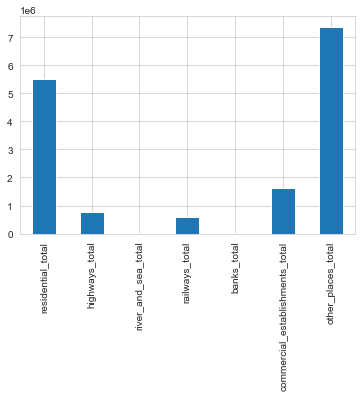

In [37]:
total_crimes_by_places.sum().plot.bar();

* A part from other places more number of crimes have been taking place in residential places

In [38]:
# reading indian population data in the year 2011
Population = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/Population%20in%20India.csv')

In [40]:
# reading indian police data from 2001 to 2010
police_01_10 = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/12_police_strength_actual_and_sanctioned.csv')

In [41]:
police_01_10.head()

,area_name,year,group_name,sub_group_name,rank_all_ranks_total,rank_asi_equivalent,rank_aspdyspassttcommandant,rank_below_hc_and_above_constables,rank_constables,rank_dgaddl_dg,rank_dig,rank_head_constables,rank_igsplig,rank_inspectors_equivalent,rank_si_equivalent,rank_sspspaddlspcommandant
0,Andaman & Nicobar Islands,2001,Actual Police Strength - Armed Police,A2. Acual Armed Police (Incl. Women Police),766,7,2,0,646,0,1,84,0,6,20,0
1,Andhra Pradesh,2001,Actual Police Strength - Armed Police,A2. Acual Armed Police (Incl. Women Police),12510,433,56,0,8742,0,0,2864,0,132,270,13
2,Arunachal Pradesh,2001,Actual Police Strength - Armed Police,A2. Acual Armed Police (Incl. Women Police),2232,14,15,169,1645,0,0,322,0,19,45,3
3,Assam,2001,Actual Police Strength - Armed Police,A2. Acual Armed Police (Incl. Women Police),23963,36,135,2347,16591,0,0,3868,0,235,699,52
4,Bihar,2001,Actual Police Strength - Armed Police,A2. Acual Armed Police (Incl. Women Police),373,0,0,0,326,0,0,41,0,2,4,0


rank_all_ranks_total gives the total count of all the police in all the departments

In [42]:
# Finding the ratio of total population to the total number of police

Total_police_2010 = pd.DataFrame(police_01_10[(police_01_10['year'] == 2010) &
            ((police_01_10['group_name'] == 'Actual Police Strength - Total') |
            (police_01_10['group_name'] == 'Sanctioned Police Strength - Total'))].groupby('area_name')['rank_all_ranks_total'].sum())

# Total_police_2010 = Total_police_2010.set_index(range(1,len(Total_police_2010)+1))


Total_police_2010

,rank_all_ranks_total
area_name,
Andaman & Nicobar Islands,8391
Andhra Pradesh,238845
Arunachal Pradesh,15195
Assam,110023
Bihar,147532
Chandigarh,11780
Chhattisgarh,84516
Dadra & Nagar Haveli,523
Daman & Diu,465


In [43]:
Population_2011 = Population[['India/State/Union Territory','Population 2011']][1:]

def f(r):
    if r == 'Andaman & Nicobar Island':
        return 'Andaman & Nicobar Islands'
    else:
        return r


Population_2011['India/State/Union Territory'] = Population_2011['India/State/Union Territory'].map(f)
Population_2011 = Population_2011.set_index('India/State/Union Territory')
Population_2011

,Population 2011
India/State/Union Territory,
Andhra Pradesh,49386799
Arunachal Pradesh,1383727
Assam,31205576
Bihar,104099452
Chhattisgarh,25545198
Goa,1458545
Gujarat,60439692
Haryana,25351462
Himachal Pradesh,6864602


In [44]:
police_distribution = Total_police_2010.join(Population_2011)

def  f(r):
    return (r['Population 2011']/r['rank_all_ranks_total']) 


police_distribution['police_per_popuplation'] = police_distribution.apply(f, axis=1)
police_distribution = police_distribution.sort_values(by = ['police_per_popuplation'], ascending = True)
police_distribution

,rank_all_ranks_total,Population 2011,police_per_popuplation
area_name,,,
Andaman & Nicobar Islands,8391,380581,45.355857
Mizoram,21976,1097206,49.927466
Manipur,55364,2855794,51.582147
Sikkim,9389,610577,65.031100
Tripura,52274,3673917,70.281918
Lakshadweep,888,64473,72.604730
Jammu & Kashmir,158539,12541302,79.105469
Chandigarh,11780,1055450,89.596774
Arunachal Pradesh,15195,1383727,91.064627


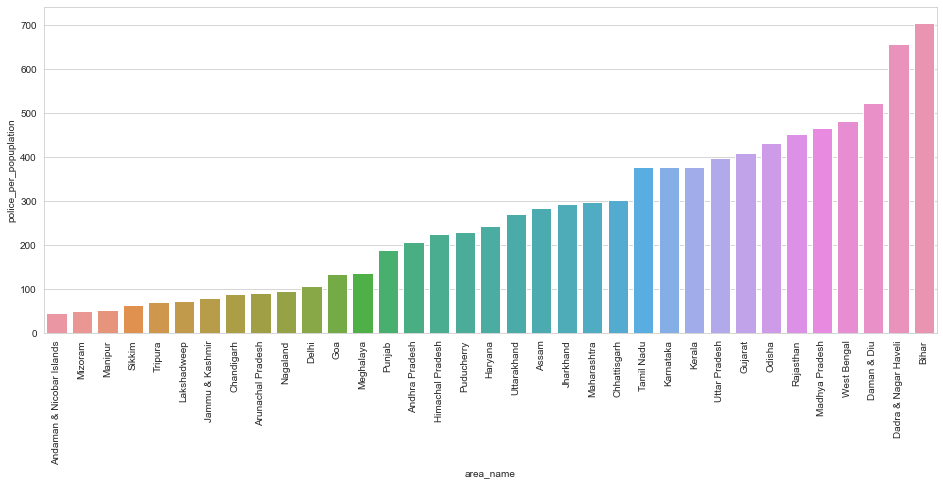

In [45]:
plt.figure(figsize = (16,6))
sns.barplot(police_distribution.index,
           police_distribution['police_per_popuplation']);
plt.xticks(rotation = 90);

the lesser the value of police_per_population, the less number of people that each police officer has to take care of,
i.e, the lesser the the better

* As seen earlier maharastra has reported more number of theft cases than any other country, and now we see that Maharastra has resonably good distribution of police per population.            
* In the top 10 States with more number of theft cases Andhra Pradesh, Delhi, Madhya Pradesh, are with good police distribution to the total population
* 7 out of 10 states have less number of police to the total population

### Analysing Kidnaps in India

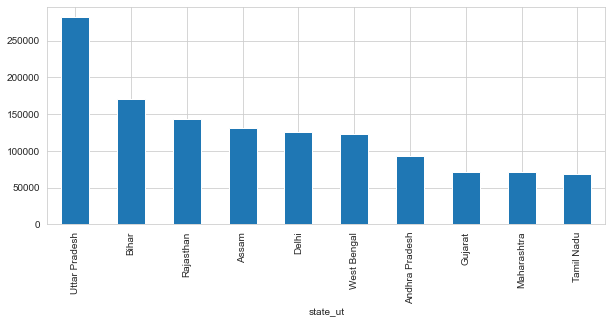

In [46]:
# plotting the distribution of thefts across different states
plt.figure(figsize = (10,4))
DWC_13_summarized.groupby('state_ut')['total_kidnaps'].sum().sort_values(ascending = False)[:10].plot.bar();

* UttarPradesh is reporting highest number of kidnaps in the country
* The above are the top 10 states which are reporting high number of rapes in the country
* Among them except Delhi, Andhra Pradesh and Maharastra has good distributin of police to the population, while the rest more population compared to the Total Police

In [47]:
Kidnap_data = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/39_specific_purpose_of_kidnapping_and_abduction.csv')

In [48]:
Kidnap_data.columns

Index(['area_name', 'year', 'group_name', 'sub_group_name',
       'k_a_cases_reported', 'k_a_female_10_15_years',
       'k_a_female_15_18_years', 'k_a_female_18_30_years',
       'k_a_female_30_50_years', 'k_a_female_above_50_years',
       'k_a_female_total', 'k_a_female_upto_10_years', 'k_a_grand_total',
       'k_a_male_10_15_years', 'k_a_male_15_18_years', 'k_a_male_18_30_years',
       'k_a_male_30_50_years', 'k_a_male_above_50_years', 'k_a_male_total',
       'k_a_male_upto_10_years'],
      dtype='object')

In [49]:
Kidnap_data.shape

(3569, 20)

In [50]:
Kidnap_data.isna().sum()

area_name                      0
year                           0
group_name                     0
sub_group_name                 0
k_a_cases_reported             7
k_a_female_10_15_years       391
k_a_female_15_18_years       338
k_a_female_18_30_years       309
k_a_female_30_50_years       450
k_a_female_above_50_years    621
k_a_female_total             162
k_a_female_upto_10_years     495
k_a_grand_total               59
k_a_male_10_15_years         483
k_a_male_15_18_years         488
k_a_male_18_30_years         367
k_a_male_30_50_years         417
k_a_male_above_50_years      558
k_a_male_total               257
k_a_male_upto_10_years       471
dtype: int64

* Null values in this data means there are no such incidents , we can replace those values with zero

In [51]:
Kidnap_data = Kidnap_data.fillna(0)

In [52]:
Kidnap_data.head()

,area_name,year,group_name,sub_group_name,k_a_cases_reported,k_a_female_10_15_years,k_a_female_15_18_years,k_a_female_18_30_years,k_a_female_30_50_years,k_a_female_above_50_years,k_a_female_total,k_a_female_upto_10_years,k_a_grand_total,k_a_male_10_15_years,k_a_male_15_18_years,k_a_male_18_30_years,k_a_male_30_50_years,k_a_male_above_50_years,k_a_male_total,k_a_male_upto_10_years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* k_a_grand_total gives total number of kidnaps in the particular category under all age groups                   
* k_a_female_total gives total number of females kidnapped in the particular category under all age groups         
* k_a_male_total gives total number of males kidnapped in the particular category under all age groups

In [53]:
Kidnap_data.groupby('sub_group_name')['k_a_grand_total'].sum()

sub_group_name
01. For Adoption                    963.0
02. For Begging                     275.0
03. for Camel Racing                  5.0
04. For Illicit Intercourse       23552.0
05. For Marriage                 119107.0
06. For Prostitution               3414.0
07. For Ransom                     9341.0
08. For Revenge                    5873.0
09. For Sale                        686.0
10. For Selling Bodyparts            16.0
11. For Slavery                     904.0
12. For Unlawful Activity          6360.0
13. Other Purposes                97505.0
14. Total (Sum of 1-13 Above)    268001.0
Name: k_a_grand_total, dtype: float64

In [54]:
Kidnap_data[Kidnap_data['group_name'] != 'Kidnap - Total'].tail()

,area_name,year,group_name,sub_group_name,k_a_cases_reported,k_a_female_10_15_years,k_a_female_15_18_years,k_a_female_18_30_years,k_a_female_30_50_years,k_a_female_above_50_years,k_a_female_total,k_a_female_upto_10_years,k_a_grand_total,k_a_male_10_15_years,k_a_male_15_18_years,k_a_male_18_30_years,k_a_male_30_50_years,k_a_male_above_50_years,k_a_male_total,k_a_male_upto_10_years
3226,Tamil Nadu,2010,Kidnap - For Other Purposes,13. Other Purposes,483.0,15.0,62.0,118.0,31.0,3.0,241.0,12.0,488.0,4.0,2.0,87.0,136.0,11.0,247.0,7.0
3227,Tripura,2010,Kidnap - For Other Purposes,13. Other Purposes,33.0,3.0,3.0,9.0,5.0,0.0,20.0,0.0,34.0,1.0,0.0,6.0,6.0,0.0,14.0,1.0
3228,Uttar Pradesh,2010,Kidnap - For Other Purposes,13. Other Purposes,792.0,18.0,13.0,39.0,12.0,0.0,85.0,3.0,792.0,29.0,38.0,390.0,221.0,8.0,707.0,21.0
3229,Uttarakhand,2010,Kidnap - For Other Purposes,13. Other Purposes,123.0,0.0,0.0,59.0,29.0,0.0,88.0,0.0,123.0,3.0,5.0,23.0,4.0,0.0,35.0,0.0
3230,West Bengal,2010,Kidnap - For Other Purposes,13. Other Purposes,2271.0,0.0,6.0,1170.0,694.0,15.0,1885.0,0.0,2271.0,4.0,6.0,198.0,172.0,5.0,386.0,1.0


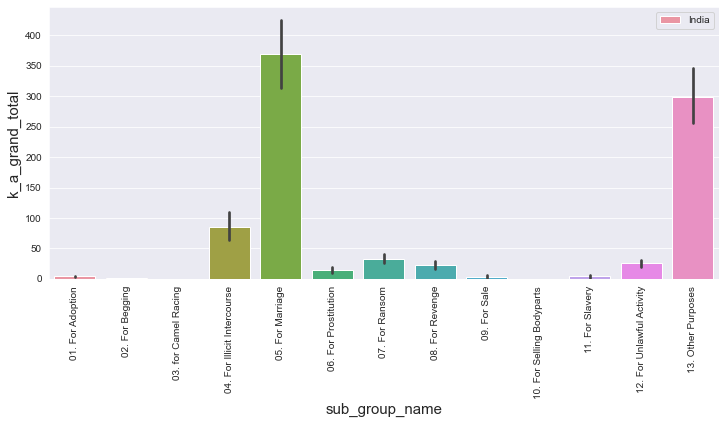

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
sns.barplot('sub_group_name',
           'k_a_grand_total',
           data = Kidnap_data[Kidnap_data['group_name'] != 'Kidnap - Total'],
           label = "India");
plt.legend()
plt.xlabel('sub_group_name',size = 15)
plt.ylabel('k_a_grand_total',size = 15)
plt.xticks(rotation = 90);

* In **India** most number of kidnaps are occuring for **Marriage**

Now lets find the major reasons for kipnaps in each and every state of India

In [56]:
# list containing all the states ansd union teritories in India
state_uts = list(Kidnap_data.area_name.unique())

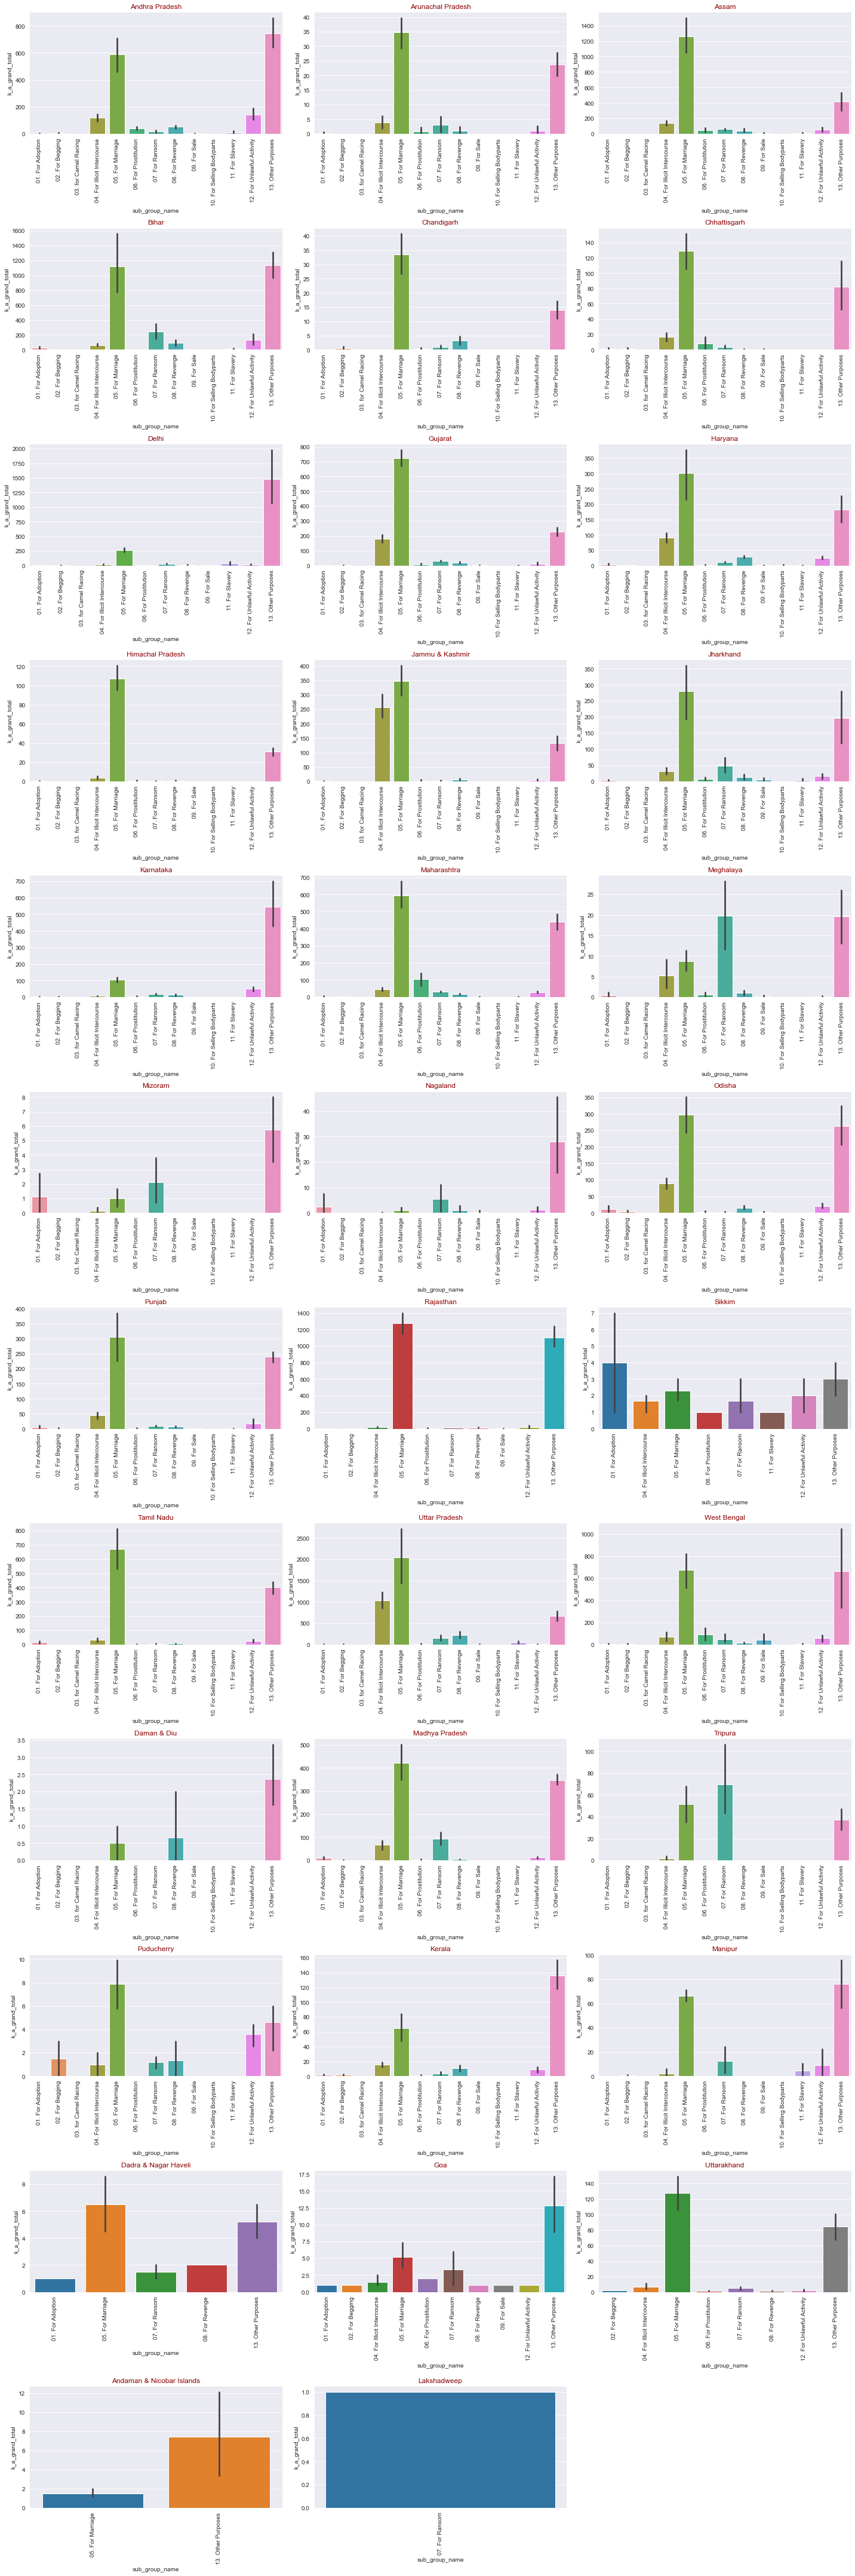

In [57]:
fig = plt.figure(figsize = (20,60))
for i,state_ut in enumerate(state_uts):
    ax = fig.add_subplot(12,3,i+1)
    sns.barplot('sub_group_name',
                'k_a_grand_total',
        data = Kidnap_data[(Kidnap_data['group_name'] != 'Kidnap - Total') & (Kidnap_data['area_name'] == state_ut )]);
    ax.set_title(state_ut,color ='DarkRed')
    plt.xticks(rotation = 90);
fig.tight_layout()

plt.show()
    

* In majority of Indian states Kidnapes have been majorly occuring for marriage and other Purposes
*     **State** -----------------------------------------------------------------------------------------------**Major Reason** 
* Andhra Pradesh,Delhi,Karnata,Mizoram, Nagaland,Kerala,Goa -----------------  Other Purposes
* Jammu and Kashmir ------------------------------------------------------------------------- Marriage, Illict Intercourse
* Meghalaya,Tripura ---------------------------------------------------------------------------- Ransom
* Sikkim -------------------------------------------------------------------------------------------- Adoption
* Daman & Diu ---------------------------------------------------------------------------------- Other Purposes and Revenge
* Lakshadweep ---------------------------------------------------------------------------------- only Ransom cases are reported

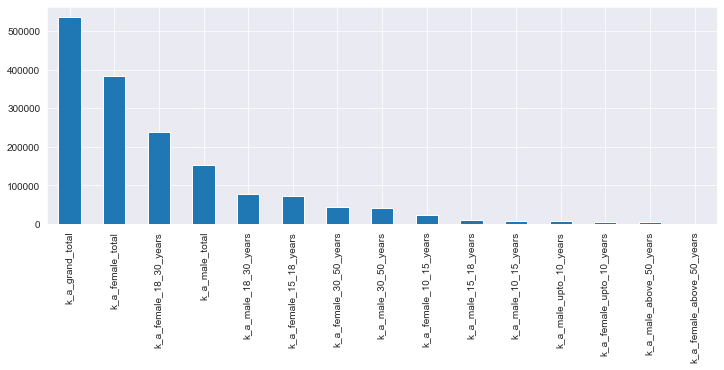

In [58]:
# plotting age wise kidnaps for both male and female and combined
plt.figure(figsize = (12,4))
Kidnap_data.sum()[5:].sort_values(ascending = False).plot.bar();

* The number of females kidnaped between the age group of 18 - 30 are more than the total number of males kidnapped under all age groups
* This is relevent because the major reason for kidnaps is marriage and the most of the people get married between 18-30 

## Offenders relation to the rape victim

In [59]:
Rape_data = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/21_offenders_known_to_the_victim.csv')

In [60]:
Rape_data.columns

Index(['area_name', 'year',
       'no_of_cases_in_which_offenders_were_known_to_the_victims',
       'no_of_cases_in_which_offenders_were_neighbours',
       'no_of_cases_in_which_offenders_were_other_known_persons',
       'no_of_cases_in_which_offenders_were_parentsclose_family_members',
       'no_of_cases_in_which_offenders_were_relatives'],
      dtype='object')

In [61]:
Rape_data.rename(columns =  {'no_of_cases_in_which_offenders_were_known_to_the_victims':'known_to_the_victims',
                         'no_of_cases_in_which_offenders_were_neighbours':'neighbours',
                         'no_of_cases_in_which_offenders_were_other_known_persons':'other_known_persons',
                         'no_of_cases_in_which_offenders_were_parentsclose_family_members':'parentsclose_family_members',
                         'no_of_cases_in_which_offenders_were_relatives':'relatives'},
                inplace = True)

In [62]:
Rape_data.isna().sum()

area_name                      0
year                           0
known_to_the_victims           0
neighbours                     0
other_known_persons            0
parentsclose_family_members    0
relatives                      0
dtype: int64

* There are no null values in the data

In [63]:
Rape_data.head()

,area_name,year,known_to_the_victims,neighbours,other_known_persons,parentsclose_family_members,relatives
0,Madhya Pradesh,2007,3010,1397,1384,49,180
1,Madhya Pradesh,2008,2937,1279,1433,52,173
2,Madhya Pradesh,2009,2998,1254,1528,14,202
3,Madhya Pradesh,2010,3135,1223,1659,21,232
4,West Bengal,2010,2134,1037,987,4,106


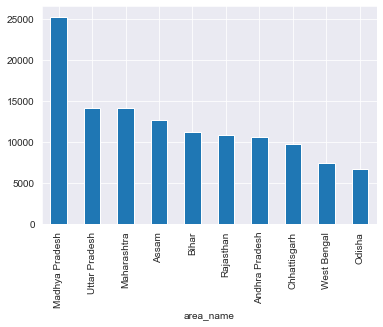

In [64]:
Rape_data.groupby('area_name')['known_to_the_victims'].sum().sort_values(ascending = False)[:10].plot.bar();

* Madya Pradesh is reporting the highest number ofrape instances in India
* Andhra Pradesh, Assam, Maharstra have good police police distribution to the total population
* Remaining 7 of 10 states have high population to thr police ratio

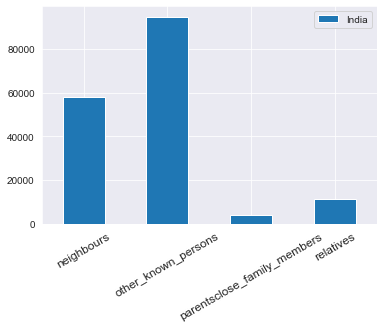

In [65]:
# plotting the Relationship distribution to the rape victim all over India
Rape_data.sum()[3:].plot.bar(label = 'India');
plt.legend()
plt.xticks(rotation = 30,size = 12);


**In India most offenders were known Rape victims other known persons than neighbors and family and follwed by neighbors**

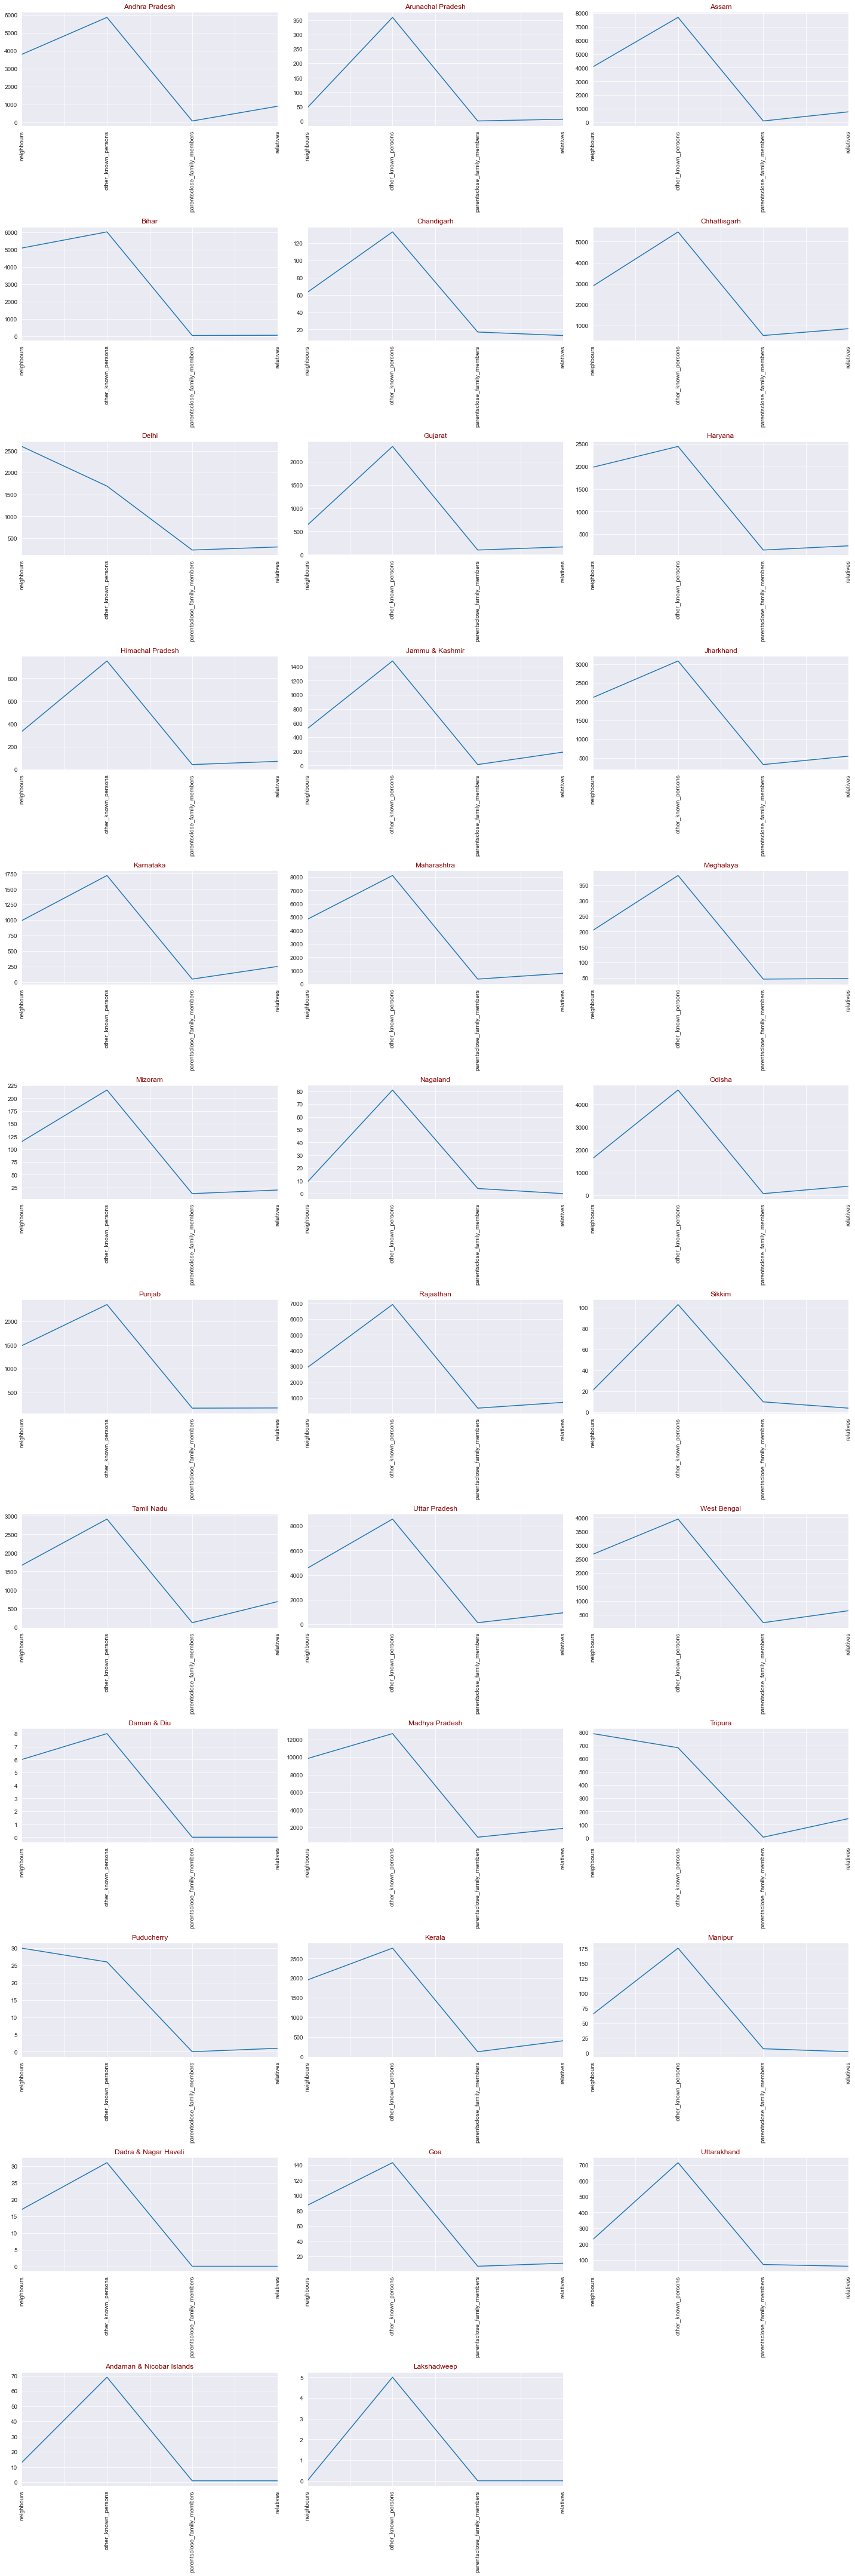

In [66]:
fig = plt.figure(figsize = (20,60))
for i,state_ut in enumerate(state_uts):
    ax = fig.add_subplot(12,3,i+1)
    Rape_data[Rape_data['area_name'] == state_ut].sum()[3:].plot(label = state_ut);
    ax.set_title(state_ut,color ='DarkRed')
    plt.xticks(rotation = 90);
fig.tight_layout()

plt.show()
    

* In most of the states the instances have been occured with known persons other than family and neighbors
* In Delhi,Tripura,Puducherry the instances are frequent with Neighbors 

## Juveniles family background, education and economic setup.

In [67]:
juveniles_arrested_family_background = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/18_03_juveniles_arrested_family_background.csv')

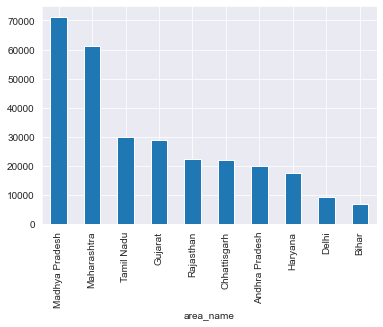

In [68]:
# plotting top 10 states in juvinile crimes
juveniles_arrested_family_background.groupby('area_name')['family_back_ground_total'].sum().sort_values(ascending = False)[:10].plot.bar();

* Madhya Pradesh has reported highest number of juvinile crimes the country
* Delhi and Andhra Pradesh are in the Top 10 states, but the distribution police to the number of people is considerably good in these states, hence this might not be the only factor that is to coinsidered while analysing these

In [69]:
juveniles_arrested_family_background.isna().sum()

area_name                                  0
year                                       0
sub_group_name                             0
family_back_ground_homeless                0
family_back_ground_living_with_guardian    0
family_back_ground_living_with_parents     0
family_back_ground_total                   0
dtype: int64

* The data has no null values

In [70]:
juveniles_arrested_family_background.sum()[3:-1]

family_back_ground_homeless                 22347
family_back_ground_living_with_guardian     47630
family_back_ground_living_with_parents     261498
dtype: object

It is Quite intersting to know that More crimes are being commited by Juviniles living with their paremts

In [72]:
juveniles_arrested_education = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/18_01_juveniles_arrested_education.csv')

In [73]:
juveniles_arrested_education.columns

Index(['area_name', 'year', 'sub_group_name',
       'education_above_primary_but_below_matric_or_higher_secondary',
       'education_illiterate', 'education_matric_or_higher_secondary_above',
       'education_total', 'education_upto_primary'],
      dtype='object')

In [74]:
juveniles_arrested_education.isna().sum()

area_name                                                       0
year                                                            0
sub_group_name                                                  0
education_above_primary_but_below_matric_or_higher_secondary    0
education_illiterate                                            0
education_matric_or_higher_secondary_above                      0
education_total                                                 0
education_upto_primary                                          0
dtype: int64

In [75]:
juveniles_arrested_education.drop(columns = 'education_total').sum()[3:]

education_above_primary_but_below_matric_or_higher_secondary     93637
education_illiterate                                             85862
education_matric_or_higher_secondary_above                       25460
education_upto_primary                                          126516
dtype: object

* people with higher education levels are less likely to commit crimes compared to people with lesser education

In [76]:
juveniles_arrested_economic_setup = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/18_02_juveniles_arrested_economic_setup.csv')

In [77]:
juveniles_arrested_economic_setup.rename(columns = {'economic_set_up_annual_income_250001_to_50000':'25001_to_50000',
                                                   'economic_set_up_annual_income_upto_rs_25000':'upto_rs_25000',
                                                   'economic_set_up_middle_income_from_100001_to_200000':'100001_to_200000',
                                                   'economic_set_up_middle_income_from_50001_to_100000':'50001_to_100000',
                                                   'economic_set_up_upper_income_above_rs_300000':'above_rs_300000',
                                                   'economic_set_up_upper_middle_income_from_200001_to_300000':'200001_to_300000'},
                                        inplace = True)

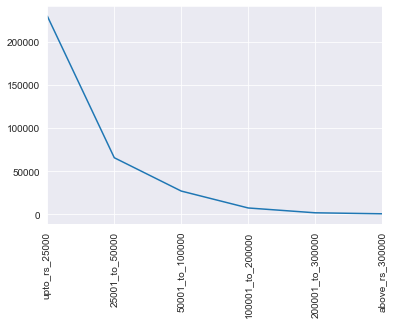

In [78]:
juveniles_arrested_economic_setup.drop(columns = 'economic_set_up_total').sum()[3:].sort_values(ascending = False).plot();
plt.xticks(rotation = 90);

* Juviniles are more in number fromm the familes with annual income less than 25000,
* As the annual income of the family increases the number of juvuniles from each economic group are decreasing
* Since the data is of juviniles getting aressted there might be a bias because affluent prople are capable enough to get prevent their children from being arrested

* **Most of the Juviniles are from lower economic background and are not well educated**

## Which state has more crime against  women

In [79]:
crimes_against_women = pd.concat([pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/42_district_wise_crimes_committed_against_women_2001_2012.csv'),
           pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/42_district_wise_crimes_committed_against_women_2013.csv')])

In [80]:
crimes_against_women.columns

Index(['state_ut', 'district', 'year', 'rape', 'kidnapping_and_abduction',
       'dowry_deaths', 'assault_on_women_with_intent_to_outrage_her_modesty',
       'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives',
       'importation_of_girls'],
      dtype='object')

In [81]:
crimes_against_women.shape

(9840, 10)

In [82]:
# State_ut values from 2001 - 2012 are capital converting them into titles
def f(r):
    return str.title(r)


crimes_against_women['state_ut'] = crimes_against_women['state_ut'].map(f)

In [83]:
crimes_against_women.groupby('state_ut').sum()[:2]

,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls
state_ut,,,,,,,,
A & N Islands,72239,218,154,12,428,86,242,0
A&N Islands,8052,54,24,2,90,16,18,0


In [84]:
# formattiing A&N Islands
def f(r):
    if r == 'A&N Islands':
        return 'A & N Islands'
    else:
        return r


crimes_against_women['state_ut'] = crimes_against_women['state_ut'].map(f)

In [85]:
crimes_against_women.drop(columns = 'year').groupby('state_ut').sum()

,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls
state_ut,,,,,,,
A & N Islands,272,178,14,518,102,260,0
Andhra Pradesh,30228,33062,13414,117858,81666,268182,34
Arunachal Pradesh,1150,1288,4,1754,42,392,0
Assam,36230,54284,2892,32058,252,96048,20
Bihar,28504,47616,29460,15814,556,60426,894
Chandigarh,652,1416,86,914,338,1798,0
Chhattisgarh,26436,9022,2502,42852,3810,21508,12
D & N Haveli,112,188,2,100,8,76,0
D&N Haveli,10,22,0,2,2,2,0


In [86]:
# creating grand_total column as the sum of crimes under all categories
def f(r):
    return r.rape + r.kidnapping_and_abduction + r.dowry_deaths + r.assault_on_women_with_intent_to_outrage_her_modesty + r.insult_to_modesty_of_women + r.cruelty_by_husband_or_his_relatives + r.importation_of_girls



crimes_against_women['grand_total'] = crimes_against_women.apply(f, axis =1)

In [87]:
crimes_against_women[crimes_against_women['district'] != 'ZZ TOTAL'].groupby('state_ut')['grand_total'].sum().sort_values(ascending = False)

state_ut
Andhra Pradesh       514006
Uttar Pradesh        479833
West Bengal          435489
Madhya Pradesh       389147
Rajasthan            381432
Maharashtra          354127
Assam                204394
Kerala               192041
Gujarat              187049
Bihar                171618
Odisha               163882
Karnataka            146064
Tamil Nadu           145172
Haryana              121597
Chhattisgarh          99149
Delhi                 96178
Jharkhand             66101
Punjab                63252
Jammu & Kashmir       61639
Tripura               26773
Uttarakhand           25356
Himachal Pradesh      22834
Delhi Ut              12853
Chandigarh             4723
Manipur                4629
Meghalaya              4355
Arunachal Pradesh      4344
Mizoram                3615
Goa                    2762
Puducherry             2523
A & N Islands          1242
Sikkim                 1187
Nagaland                880
D & N Haveli            486
Daman & Diu             198
Lakshadweep

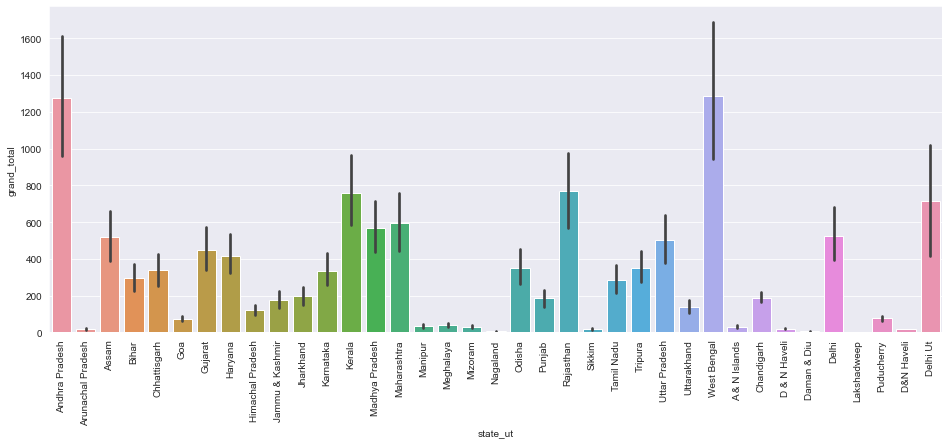

In [88]:
plt.figure(figsize = (16,6))
sns.barplot('state_ut',
           'grand_total',
           data = crimes_against_women[crimes_against_women['district'] != 'ZZ TOTAL']);
plt.xticks(rotation = 90);

* The majority of crimes against women are happing in Andhra Pradesh
* Of the top 10 states against crimes aginst woen Andhra Pradesh and Maharastra have good population to police ratio and rest of the states this ratio is low

In [89]:
crimes_against_women[crimes_against_women['state_ut'] == 'Andhra Pradesh'].sum(axis = 0)[3:-1].sort_values(ascending = False)

cruelty_by_husband_or_his_relatives                    268182
assault_on_women_with_intent_to_outrage_her_modesty    117858
insult_to_modesty_of_women                              81666
kidnapping_and_abduction                                33062
rape                                                    30228
dowry_deaths                                            13414
importation_of_girls                                       34
dtype: object

* Of the crimes happening in Andhra Pradesh against women cruelty_by_husband_or_his_relatives are significantly in high number

## Crimes Against Children

In [90]:
Crimes_against_children = pd.concat([pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/03_district_wise_crimes_committed_against_children_2001_2012.csv'),
                                     pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/03_district_wise_crimes_committed_against_children_2013.csv')])

In [91]:
Crimes_against_children.isna().sum()

abetment_of_suicide                    11
buying_of_girls_for_prostitution       11
district                                0
exposure_and_abandonment               11
foeticide                              11
infanticid                           9015
kidnapping_and_abduction               11
murder                                834
other_crimes                           11
other_murder                         9015
procuration_of_minor_girls             11
prohibition_of_child_marriage_act      11
rape                                   11
selling_of_girls_for_prostitution      11
state_ut                                0
total                                   0
year                                    0
dtype: int64

In [92]:
Crimes_against_children = Crimes_against_children.fillna(0)

Total represents the total number of crimes against children 

In [94]:
# State_ut values from 2001 - 2012 are capital converting them into titles
def f(r):
    return str.title(r)


Crimes_against_children['state_ut'] = Crimes_against_children['state_ut'].map(f)

In [95]:
# formattiing A&N Islands
def f(r):
    if r == 'A&N Islands':
        return 'A & N Islands'
    if r == 'D&N Haveli':
        return 'D & N Haveli'
    if r == 'Delhi Ut':
        return 'Delhi'
    else:
        return r


Crimes_against_children['state_ut'] = Crimes_against_children['state_ut'].map(f)

In [96]:
Crimes_against_children.groupby('state_ut')['total'].sum()

state_ut
A & N Islands           598
Andhra Pradesh        38310
Arunachal Pradesh       664
Assam                  4476
Bihar                 22886
Chandigarh             1932
Chhattisgarh          34379
D & N Haveli            234
Daman & Diu             104
Delhi                 64447
Goa                    2140
Gujarat               26502
Haryana               12140
Himachal Pradesh       4838
Jammu & Kashmir        1014
Jharkhand              2188
Karnataka              9774
Kerala                17636
Lakshadweep               4
Madhya Pradesh       107264
Maharashtra           75422
Manipur                1476
Meghalaya              1806
Mizoram                1002
Nagaland                152
Odisha                 6438
Puducherry              504
Punjab                12614
Rajasthan             27964
Sikkim                  632
Tamil Nadu            14214
Tripura                1932
Uttar Pradesh         91718
Uttarakhand            1839
West Bengal           18576
Name: total

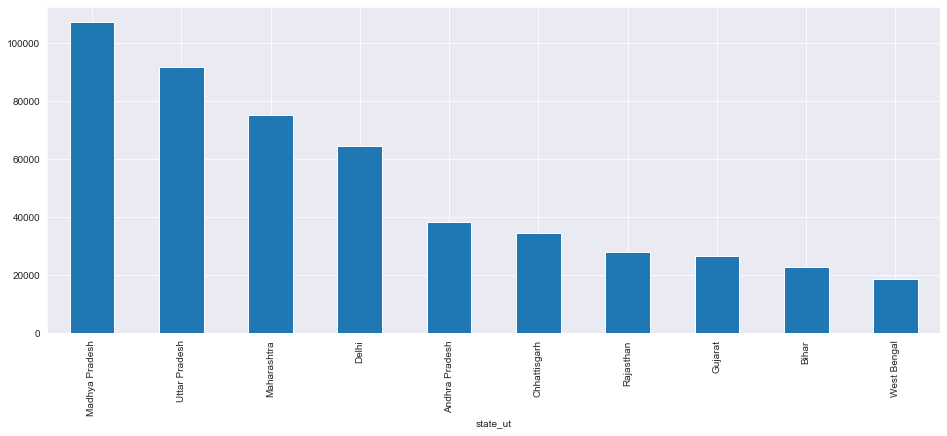

In [97]:
plt.figure(figsize = (16,6))
Crimes_against_children.groupby('state_ut')['total'].sum().sort_values(ascending = False)[:10].plot.bar();
plt.xticks(size = 10);
plt.yticks(size = 10);

* Madhya Pradesh has maximum number of crimes against children
* Andhra Pradesh and Delhi are the two states in the top 10 states with highest crimes against children to have good population to the police Ratio

## Age group wise murder victim

In [98]:
murder_victims_age = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/32_murder_victim_age_sex.csv')

In [99]:
murder_victims_age.isna().sum()

area_name                   0
year                        0
group_name                  0
sub_group_name              0
victims_above_50_yrs       56
victims_total               0
victims_upto_10_15_yrs    142
victims_upto_10_yrs       118
victims_upto_15_18_yrs    130
victims_upto_18_30_yrs      9
victims_upto_30_50_yrs     11
dtype: int64

In [100]:
murder_victims_age.rename(columns = {'victims_above_50_yrs':'above_50_yrs',
                                    'victims_upto_10_15_yrs':'10_15_yrs',
                                    'victims_upto_10_yrs':'upto_10_yrs',
                                    'victims_upto_15_18_yrs':'15_18_yrs',
                                    'victims_upto_18_30_yrs':'18_30_yrs',
                                    'victims_upto_30_50_yrs':'30_50_yrs'},
                         inplace = True)

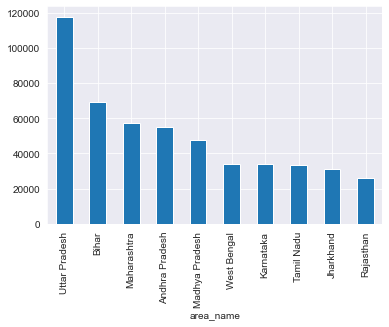

In [101]:
murder_victims_age.groupby('area_name')['victims_total'].sum().sort_values(ascending = False)[:10].plot.bar();

* Uttar Pradesh is recording high number of murders in India
* Andhra Pradesh , Jharkand and Maharastra are in top 10 states in murders with low population to police ratio and rest have high

In [102]:
murder_victims_age = murder_victims_age.fillna(0)

In [103]:
murder_victims_age.isna().sum()

area_name         0
year              0
group_name        0
sub_group_name    0
above_50_yrs      0
victims_total     0
10_15_yrs         0
upto_10_yrs       0
15_18_yrs         0
18_30_yrs         0
30_50_yrs         0
dtype: int64

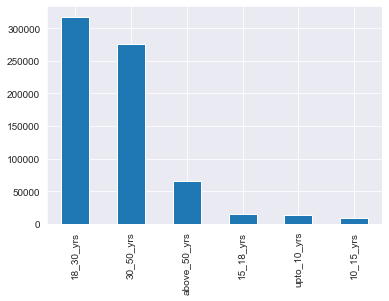

In [104]:
murder_victims_age.drop(columns = 'victims_total').sum()[4:].sort_values(ascending = False).plot.bar();

* It is seen that majority of murder victims are under between age group of 18 to 30 years

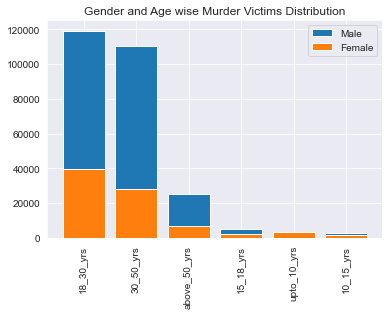

In [105]:
# Plotting the distribution of male and female murder victims for different age groups
Female_murders = murder_victims_age[murder_victims_age['group_name'] == 'Murder - Female Victims'].drop(columns = 'victims_total').sum()[4:].sort_values(ascending = False)
Male_murders = murder_victims_age[murder_victims_age['group_name'] == 'Murder - Male Victims'].drop(columns = 'victims_total').sum()[4:].sort_values(ascending = False)


plt.bar(Male_murders.index, Male_murders, label = 'Male')
plt.bar(Female_murders.index, Female_murders,label = 'Female')
plt.xticks(rotation =90)
plt.title('Gender and Age wise Murder Victims Distribution')
plt.legend();

* For both Male and Female murder victims the majority are between the age of 18 to 30 years

## Anti corruption cases vs arrests

In [106]:
anti_corruption_cases = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/23_anti_corruprion_cases.csv')

In [107]:
anti_corruption_arrests = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/24_anti_corruption_arrests.csv')

In [108]:
anti_corruption_arrests.isna().sum()

area_name                                                                                                      0
year                                                                                                           0
aca01_no_of_persons_in_custody_or_on_bail_during_the_stage_of_investigation_at_the_beginning_of_the_year       0
aca02_no_of_persons_arrested_during_the_year                                                                   0
aca04_no_of_persons_in_custody_or_on_bail_during_the_stage_of_investigation_at_the_end_of_the_year             0
aca05_no_of_persons_in_whose_cases_charge_sheets_were_laid_during_the_year                                     0
aca06_no_of_persons_under_trial_at_the_beginning_of_the_year                                                   0
aca07_total_no_of_persons_under_trial_during_the_year                                                          0
aca08_no_of_persons_whose_cases_were_withdrawn_or_otherwise_disposed_off_during_the_year        

In [109]:
anti_corruption_arrests =  anti_corruption_arrests.fillna(0)

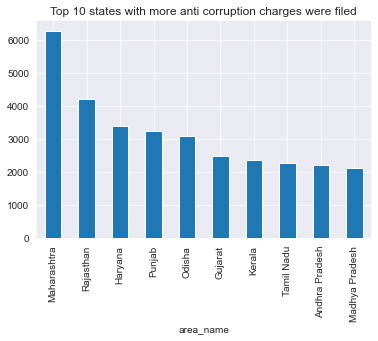

In [110]:
anti_corruption_arrests.groupby('area_name')['aca05_no_of_persons_in_whose_cases_charge_sheets_were_laid_during_the_year'].sum().sort_values(ascending = False)[:10].plot.bar();
plt.title('Top 10 states with more anti corruption charges were filed');

* Maharatra, Andhra Pradesh, Punjab, Haryana have good police to population ratio

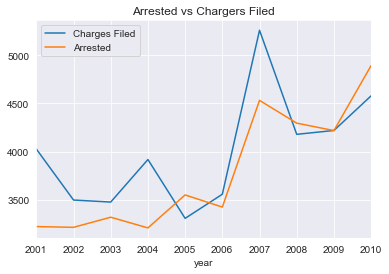

In [111]:
anti_corruption_arrests.groupby('year')['aca05_no_of_persons_in_whose_cases_charge_sheets_were_laid_during_the_year'].sum().plot(label = 'Charges Filed');
anti_corruption_arrests.groupby('year')['aca02_no_of_persons_arrested_during_the_year'].sum().plot(label = 'Arrested');
plt.legend();
plt.title('Arrested vs Chargers Filed');

In the case of anti corruption it is seen that number of arrests were less than the number of cases inspite of the pending previous years cases

## Which state has more number of complaints against police?


In [112]:
complaints_against_police = pd.read_csv('https://raw.githubusercontent.com/Rupakanth/Projects/master/Crime%20Data%20Analysis/Data/25_complaints_against_police.csv')

In [113]:
complaints_against_police.columns

Index(['area_name', 'year', 'sub_group', 'cpa_cases_registered',
       'cpa_cases_reported_for_dept_action',
       'cpa_complaints_cases_declared_false_unsubstantiated',
       'cpa_complaints_received_alleged', 'cpa_no_of_departmental_enquiries',
       'cpa_no_of_magisterial_enquiries',
       'cpa_cases_sent_for_trials_charge_sheeted',
       'cpa_no_of_judicial_enquiries', 'cpb_police_personnel_acquitted',
       'cpb_police_personnel_convicted',
       'cpb_police_personnel_sent_up_for_trial',
       'cpb_police_personnel_trial_completed',
       'cpb_police_personnel_cases_withdrawn_or_otherwise_disposed_of',
       'cpc_police_personnel_cases_trial_completed',
       'cpc_police_personnel_cases_withdrawn_or_otherwise_disposed_of',
       'cpc_police_personnel_disciplinary_action_initiated',
       'cpc_police_personnel_dismissal_removal_from_service',
       'cpc_police_personnel_major_punishment_awarded',
       'cpc_police_personnel_minor_punishment_awarded'],
      dtype='o

In [114]:
complaints_against_police.isna().sum()

area_name                                                        0
year                                                             0
sub_group                                                        0
cpa_cases_registered                                             0
cpa_cases_reported_for_dept_action                               0
cpa_complaints_cases_declared_false_unsubstantiated              0
cpa_complaints_received_alleged                                  0
cpa_no_of_departmental_enquiries                                 0
cpa_no_of_magisterial_enquiries                                  0
cpa_cases_sent_for_trials_charge_sheeted                         0
cpa_no_of_judicial_enquiries                                     0
cpb_police_personnel_acquitted                                   0
cpb_police_personnel_convicted                                   0
cpb_police_personnel_sent_up_for_trial                           0
cpb_police_personnel_trial_completed                          

In [115]:
complaints_against_police.tail()

,area_name,year,sub_group,cpa_cases_registered,cpa_cases_reported_for_dept_action,cpa_complaints_cases_declared_false_unsubstantiated,cpa_complaints_received_alleged,cpa_no_of_departmental_enquiries,cpa_no_of_magisterial_enquiries,cpa_cases_sent_for_trials_charge_sheeted,...,cpb_police_personnel_convicted,cpb_police_personnel_sent_up_for_trial,cpb_police_personnel_trial_completed,cpb_police_personnel_cases_withdrawn_or_otherwise_disposed_of,cpc_police_personnel_cases_trial_completed,cpc_police_personnel_cases_withdrawn_or_otherwise_disposed_of,cpc_police_personnel_disciplinary_action_initiated,cpc_police_personnel_dismissal_removal_from_service,cpc_police_personnel_major_punishment_awarded,cpc_police_personnel_minor_punishment_awarded
345,Tamil Nadu,2010,Complaints Against Police Personnel,107,67,15,366,282,62,80,...,0,81,18,6,550,295,1620,32,457,642
346,Tripura,2010,Complaints Against Police Personnel,28,7,5,34,9,0,16,...,0,20,1,2,9,37,90,13,17,18
347,Uttar Pradesh,2010,Complaints Against Police Personnel,8701,8326,3418,12119,8693,8,45,...,0,95,7,1,8158,492,8650,171,1025,6962
348,Uttarakhand,2010,Complaints Against Police Personnel,15,71,596,682,682,0,7,...,0,7,0,0,276,59,358,9,20,247
349,West Bengal,2010,Complaints Against Police Personnel,5,27,0,33,32,0,5,...,0,5,0,0,32,11,214,0,99,382


In [116]:
# Creating a new column for total number of complaints against police

def f(r):
    return r.cpa_cases_registered + r.cpa_cases_reported_for_dept_action + r.cpa_complaints_cases_declared_false_unsubstantiated + r.cpa_complaints_received_alleged
    

complaints_against_police['total_complaints'] = complaints_against_police.apply(f, axis = 1) 

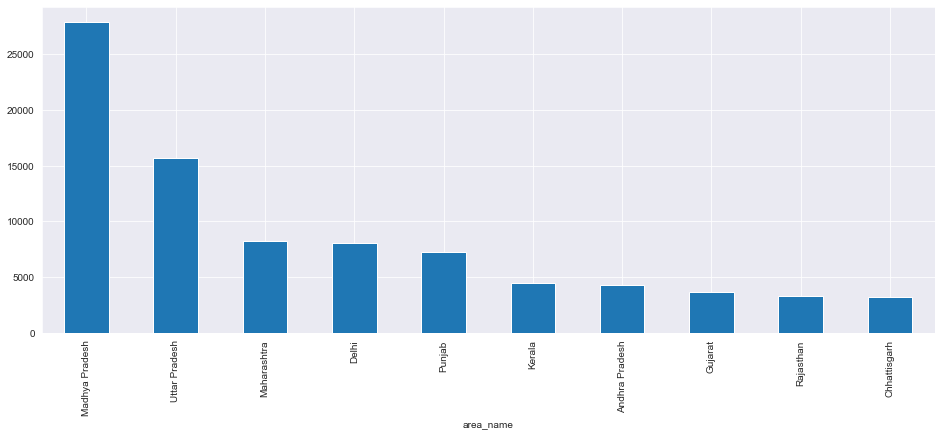

In [117]:
plt.figure(figsize = (16,6))
complaints_against_police.groupby('area_name')['total_complaints'].mean().sort_values(ascending = False)[:10].plot.bar();


* Madhya Pradesh has maximum number of complaints aginst police
* Mahrastra, Delhi and Andhra Pradesh good population to police ratio among top 10 states

In [118]:
complaints_against_police_total = pd.DataFrame(complaints_against_police.groupby('area_name')['total_complaints'].mean())

In [119]:
police_pop_avg = pd.DataFrame(police_01_10.groupby('area_name')['rank_all_ranks_total'].mean())

In [120]:
police_vs_complaints = complaints_against_police_total.join(police_pop_avg)

def f(r):
    return r['total_complaints']/r['rank_all_ranks_total'] * 100


police_vs_complaints['complaints_percent'] = police_vs_complaints.apply(f, axis =1)

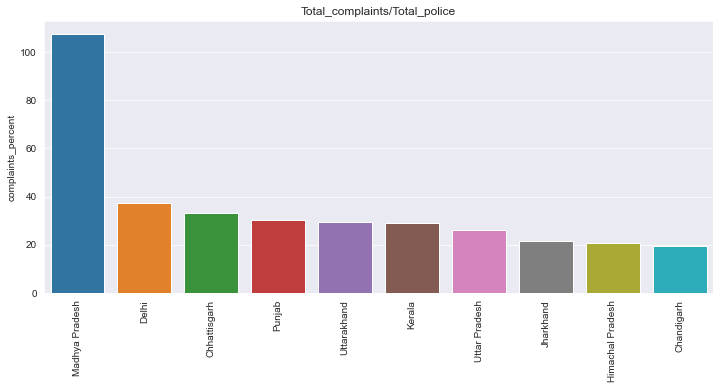

In [121]:
plt.figure(figsize = (12,5))
ind = list(police_vs_complaints.sort_values(by = 'complaints_percent', ascending = False)[:10].index)
sns.barplot(ind,
           'complaints_percent',
           data = police_vs_complaints.sort_values(by = 'complaints_percent', ascending = False)[:10])
plt.xticks(rotation = 90);
plt.title('Total_complaints/Total_police');

* The above graph shows the percentage of complaints to the total police in all the states of India

## Which state is the safest for foreigners?

In [122]:
DWC_13.columns

Index(['state_ut', 'district', 'year', 'murder', 'attempt_to_murder',
       'culpable_homicide_not_amounting_to_murder', 'rape', 'custodial_rape',
       'other_rape', 'kidnapping_abduction',
       'kidnapping_and_abduction_of_women_and_girls',
       'kidnapping_and_abduction_of_others', 'dacoity',
       'preparation_and_assembly_for_dacoity', 'robbery', 'burglary', 'theft',
       'auto_theft', 'other_theft', 'riots', 'criminal_breach_of_trust',
       'cheating', 'counterfieting', 'arson', 'hurt_grevious_hurt',
       'dowry_deaths', 'assault_on_women_with_intent_to_outrage_her_modesty',
       'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives',
       'importation_of_girls_from_foreign_countries',
       'causing_death_by_negligence', 'other_ipc_crimes', 'total_ipc_crimes',
       'total_theft', 'crimes_against_women', 'total_murders', 'total_kidnaps',
       'total_communal', 'total_cheatings'],
      dtype='object')

In [123]:
DWC_13.isna().sum()

state_ut                                               0
district                                               0
year                                                   0
murder                                                 0
attempt_to_murder                                      0
culpable_homicide_not_amounting_to_murder              0
rape                                                   0
custodial_rape                                         0
other_rape                                             0
kidnapping_abduction                                   0
kidnapping_and_abduction_of_women_and_girls            0
kidnapping_and_abduction_of_others                     0
dacoity                                                0
preparation_and_assembly_for_dacoity                   0
robbery                                                0
burglary                                               0
theft                                                  0
auto_theft                     

In [124]:
DWC_13.head()

,state_ut,district,year,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,kidnapping_abduction,...,importation_of_girls_from_foreign_countries,causing_death_by_negligence,other_ipc_crimes,total_ipc_crimes,total_theft,crimes_against_women,total_murders,total_kidnaps,total_communal,total_cheatings
0,Andhra Pradesh,ADILABAD,2001,101,60,17,50,0,50,46,...,0,181,1518,4154,646,474,342,92,1256,121
1,Andhra Pradesh,ANANTAPUR,2001,151,125,1,23,0,23,53,...,0,270,754,4125,947,349,546,106,1781,84
2,Andhra Pradesh,CHITTOOR,2001,101,57,2,27,0,27,59,...,0,404,1262,5818,1701,449,562,118,2284,251
3,Andhra Pradesh,CUDDAPAH,2001,80,53,1,20,0,20,25,...,0,233,1181,3140,449,278,366,50,983,51
4,Andhra Pradesh,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,0,431,2313,6507,2508,472,580,98,1356,273


In [125]:
# State_ut values from 2001 - 2012 are capital converting them into titles
def f(r):
    return str.title(r)


DWC_13['state_ut'] = DWC_13['state_ut'].map(f)

In [126]:
Population_2011_2 = Population[['India/State/Union Territory','Population 2011']][1:]

def f(r):
    if r == 'Andaman & Nicobar Island':
        return 'A & N Islands'
    if r == 'Dadra & Nagar Haveli':
        return 'D & N Haveli'
    else:
        return r


Population_2011_2['India/State/Union Territory'] = Population_2011_2['India/State/Union Territory'].map(f)
Population_2011_2 = Population_2011_2.set_index('India/State/Union Territory')

In [127]:
pop_crimes = pd.DataFrame(DWC_13[DWC_13['year'] == 2011].groupby('state_ut')['total_ipc_crimes'].sum()).join(Population_2011_2)

def f(r):
    return (r.total_ipc_crimes/r['Population 2011'])*100


pop_crimes['crimes_per_pop'] = pop_crimes.apply(f, axis =1)
pop_crimes

,total_ipc_crimes,Population 2011,crimes_per_pop
state_ut,,,
A & N Islands,1586,380581,0.416731
Andhra Pradesh,379560,49386799,0.768545
Arunachal Pradesh,4572,1383727,0.330412
Assam,133428,31205576,0.427577
Bihar,271792,104099452,0.261089
Chandigarh,7084,1055450,0.671183
Chhattisgarh,114436,25545198,0.447975
D & N Haveli,744,343709,0.216462
Daman & Diu,448,243247,0.184175


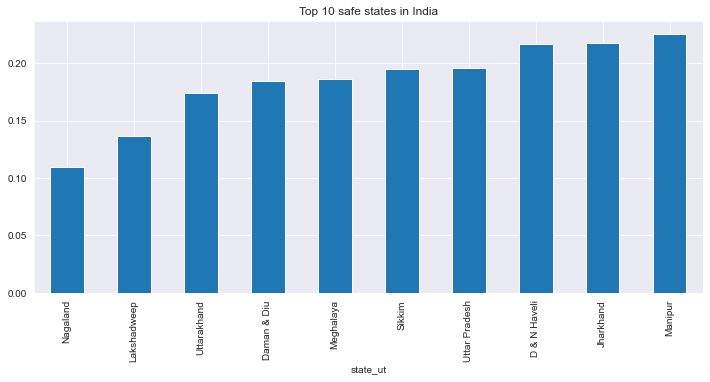

In [128]:
plt.figure(figsize = (12,5))
pop_crimes['crimes_per_pop'].sort_values()[:10].plot.bar();
plt.title('Top 10 safe states in India');

The above states are reporting the lowest crime to the total Population of each state, The top among these states can be consideres as the Safest States for foreiners

* Except for Daman & Diu and Dadra & Nagar Haveli the remaing 8 states in the top 10 safest staes have more number of polivwe distribution per population
* Hence, we might come to an understanding that police distribution to the total population is one of the important factor taht is governing that total amount of crimes in almost all the states in India

* After analysing different kinds of crimes in all the states of India, Distribution of Police to the Total Population of the state seems to be like one of the important factor in states where the combined or individual crimes are high
* Some focus should be made on Andhra Pradesh and Maharastra because even after having good police distribution crimes are comapritively high in these states.